#MGSC 410 Midterm

**Authors**: Tiffany Le & Michael Morrison

Please click on the text to access the link!

* [Google Slide Deck](https://docs.google.com/presentation/d/1bcttBEIW2ZB-nkOBxWv930J67OpXR532zqo6lDBBdHQ/edit?usp=sharing)
* [Cleaned Dataset](https://drive.google.com/file/d/1kcwQN8St3NHgZtsff8cQ2UBJOOotta0q/view?usp=sharing)
* [YouTube Video](https://youtu.be/JVS7n2aL0jM)
* [README (Google Docs)](https://docs.google.com/document/d/1wpNGyp6AJAMQ3XcqMlOF1l7qHS5L40h3sRMFts8i8hE/edit?usp=sharing)

## Imports

In [ ]:
# basic imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import chi2_contingency

# Geospatial Analysis Imports
import geopandas as gpd
from shapely.geometry import Point

# pipeline imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

# modeling imports
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor

# performance metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Reading

In [ ]:
# read in the data
df = pd.read_csv('/content/drive/MyDrive/SeniorYear/MGSC 410/Assignment #2/lotwize_case.csv')
df

,schools/0/distance,schools/1/grades,schools/2/level,schools/0/name,schools/1/rating,schools/2/size,schools/0/totalCount,schools/1/type,county,isRentalListingOffMarket,...,nearbyHomes/1/propertyTypeDimension,nearbyHomes/1/state,nearbyHomes/2/bathrooms,nearbyHomes/2/bedrooms,nearbyHomes/2/livingArea,nearbyHomes/2/livingAreaUnits,nearbyHomes/2/livingAreaUnitsShort,nearbyHomes/2/livingAreaValue,nearbyHomes/2/zpid,resoFacts/flooring/0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,1.0,2.0,1100.0,Square Feet,sqft,1100.0,2.077507e+09,Tile
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,3.0,4.0,1990.0,Square Feet,sqft,1990.0,1.560648e+07,Hardwood
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,NaN,NaN,NaN,NaN,NaN,NaN,1.252437e+08,Linoleum
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carpet
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carpet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,3.0,5.0,2579.0,Square Feet,sqft,2579.0,4.330972e+08,NaN
9625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,NaN,NaN,NaN,NaN,NaN,NaN,4.330982e+08,NaN
9626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,NaN,NaN,NaN,NaN,NaN,NaN,4.331076e+08,NaN
9627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Apartment,CA,4.0,4.0,NaN,NaN,NaN,NaN,3.484835e+08,NaN


**Drop URL features**

In [ ]:
# get the names of the cols w/ urls
urls = ['hdpUrl', 'neighborhoodMapThumb/0/url', 'priceHistory/1/attributeSource/infoString3', 'staticMap/sources/0/url', 'staticMap/sources/1/url',
        'staticMap/sources/3/url', 'staticMap/sources/4/url', 'streetView/addressSources/0/url',
        'streetView/addressSources/1/url', 'streetView/addressSources/2/url',
        'streetView/latLongSources/0/url', 'streetView/latLongSources/2/url',
        'streetViewTileImageUrlMediumAddress', 'streetViewTileImageUrlMediumLatLong',
        'thumb/0/url']

# drop all features with URLs
df = df.drop(columns=urls)
df

,schools/0/distance,schools/1/grades,schools/2/level,schools/0/name,schools/1/rating,schools/2/size,schools/0/totalCount,schools/1/type,county,isRentalListingOffMarket,...,nearbyHomes/1/propertyTypeDimension,nearbyHomes/1/state,nearbyHomes/2/bathrooms,nearbyHomes/2/bedrooms,nearbyHomes/2/livingArea,nearbyHomes/2/livingAreaUnits,nearbyHomes/2/livingAreaUnitsShort,nearbyHomes/2/livingAreaValue,nearbyHomes/2/zpid,resoFacts/flooring/0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,1.0,2.0,1100.0,Square Feet,sqft,1100.0,2.077507e+09,Tile
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,3.0,4.0,1990.0,Square Feet,sqft,1990.0,1.560648e+07,Hardwood
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,NaN,NaN,NaN,NaN,NaN,NaN,1.252437e+08,Linoleum
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carpet
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carpet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,3.0,5.0,2579.0,Square Feet,sqft,2579.0,4.330972e+08,NaN
9625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,NaN,NaN,NaN,NaN,NaN,NaN,4.330982e+08,NaN
9626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,NaN,NaN,NaN,NaN,NaN,NaN,4.331076e+08,NaN
9627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Apartment,CA,4.0,4.0,NaN,NaN,NaN,NaN,3.484835e+08,NaN


**Drop School-Related Features**

In [ ]:
# get the school-related features
school_col = ['schools/0/distance', 'schools/0/name']
df = df.drop(columns=school_col)
df

,schools/1/grades,schools/2/level,schools/1/rating,schools/2/size,schools/0/totalCount,schools/1/type,county,isRentalListingOffMarket,mortgageRates/thirtyYearFixedRate,propertyTypeDimension,...,nearbyHomes/1/propertyTypeDimension,nearbyHomes/1/state,nearbyHomes/2/bathrooms,nearbyHomes/2/bedrooms,nearbyHomes/2/livingArea,nearbyHomes/2/livingAreaUnits,nearbyHomes/2/livingAreaUnitsShort,nearbyHomes/2/livingAreaValue,nearbyHomes/2/zpid,resoFacts/flooring/0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,1.0,2.0,1100.0,Square Feet,sqft,1100.0,2.077507e+09,Tile
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,3.0,4.0,1990.0,Square Feet,sqft,1990.0,1.560648e+07,Hardwood
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,NaN,NaN,NaN,NaN,NaN,NaN,1.252437e+08,Linoleum
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carpet
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carpet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,3.0,5.0,2579.0,Square Feet,sqft,2579.0,4.330972e+08,NaN
9625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,NaN,NaN,NaN,NaN,NaN,NaN,4.330982e+08,NaN
9626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,NaN,NaN,NaN,NaN,NaN,NaN,4.331076e+08,NaN
9627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Apartment,CA,4.0,4.0,NaN,NaN,NaN,NaN,3.484835e+08,NaN


## Data Cleaning

* Removing Highly Correlated Features
* Value Imputation

### Removing Highly Correlated Features
* Correlation Analysis
* Chi-Square

In [ ]:
# Get a list of categorical features (based on dtype 'object' or low unique values)
cat = df.select_dtypes(include=['object']).columns.tolist()

# Get a list of continuous features (based on dtype 'int64' or 'float64')
cont = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the feature names
print("Categorical feature names:", cat)
print("Continuous feature names:", cont)

Categorical feature names: ['schools/1/grades', 'schools/2/level', 'schools/1/type', 'county', 'isRentalListingOffMarket', 'propertyTypeDimension', 'resoFacts/constructionMaterials/0', 'resoFacts/flooring/1', 'resoFacts/rooms/1/roomFeatures/0', 'resoFacts/propertyCondition', 'resoFacts/foundationDetails/0', 'resoFacts/architecturalStyle', 'resoFacts/fencing', 'resoFacts/utilities/0', 'resoFacts/view/0', 'resoFacts/rooms/1/roomType', 'resoFacts/interiorFeatures/0', 'resoFacts/listingTerms', 'resoFacts/communityFeatures/0', 'resoFacts/patioAndPorchFeatures/0', 'resoFacts/patioAndPorchFeatures/1', 'resoFacts/patioAndPorchFeatures/2', 'nearbyHomes/0/homeStatus', 'nearbyHomes/3/homeType', 'priceHistory/1/date', 'priceHistory/3/date', 'priceHistory/5/date', 'adTargets/aamgnrc1', 'adTargets/city', 'adTargets/listtp', 'adTargets/lot', 'adTargets/prange', 'adTargets/price_band', 'adTargets/proptp', 'adTargets/sqftrange', 'adTargets/state', 'adTargets/yrblt', 'adTargets/zestibuck', 'address/city

**Correlation Analysis**

Removing any variables with a 0.7 correlation score or higher to avoid any potentials of multicollinearity

In [ ]:
# get the correlation
corr = df[cont].corr()

threshold = 0.7

# select feature names with correlation of 70% or higher with 'price'
high_corr_features = corr.loc[abs(corr['price']) >= threshold, 'price'].index.tolist()

# remove price from list
high_corr_features.remove('price')

high_corr_features

['mortgageRates/thirtyYearFixedRate',
 'priceHistory/0/price',
 'priceHistory/2/price',
 'adTargets/price',
 'lastSoldPrice',
 'mortgageZHLRates/thirtyYearFixedBucket/rate',
 'nearbyHomes/0/price',
 'priceHistory/1/price',
 'rentZestimate',
 'zestimate',
 'zestimateMinus30']

In [ ]:
df = df.drop(columns=high_corr_features)
df

,schools/1/grades,schools/2/level,schools/1/rating,schools/2/size,schools/0/totalCount,schools/1/type,county,isRentalListingOffMarket,propertyTypeDimension,monthlyHoaFee,...,nearbyHomes/1/propertyTypeDimension,nearbyHomes/1/state,nearbyHomes/2/bathrooms,nearbyHomes/2/bedrooms,nearbyHomes/2/livingArea,nearbyHomes/2/livingAreaUnits,nearbyHomes/2/livingAreaUnitsShort,nearbyHomes/2/livingAreaValue,nearbyHomes/2/zpid,resoFacts/flooring/0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,1.0,2.0,1100.0,Square Feet,sqft,1100.0,2.077507e+09,Tile
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,3.0,4.0,1990.0,Square Feet,sqft,1990.0,1.560648e+07,Hardwood
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,...,Single Family,CA,NaN,NaN,NaN,NaN,NaN,NaN,1.252437e+08,Linoleum
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carpet
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carpet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,3.0,5.0,2579.0,Square Feet,sqft,2579.0,4.330972e+08,NaN
9625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,NaN,NaN,NaN,NaN,NaN,NaN,4.330982e+08,NaN
9626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single Family,CA,NaN,NaN,NaN,NaN,NaN,NaN,4.331076e+08,NaN
9627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Apartment,CA,4.0,4.0,NaN,NaN,NaN,NaN,3.484835e+08,NaN


**Testing Chi-Square**

Checking the p-value and significance of the variables. Due to the size of the dataset, we want to highly reduce the number of features so our threshold is much stricter.

In [ ]:
# Ensure 'price' is numeric, converting invalid parsing to NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows where 'price' is NaN
df = df.dropna(subset=['price'])

# Function to perform chi-square test for each categorical variable against 'price'
def chi_square_test(df, cat_vars, target_var):
    p_values = {}
    for cat in cat_vars:
        # Create contingency table
        contingency_table = pd.crosstab(df[cat], df[target_var])
        # Perform chi-square test
        _, p_value, _, _ = chi2_contingency(contingency_table)
        # Store the p-value in the dictionary
        p_values[cat] = p_value

    return p_values

# get the chi square results
chi_square_results = chi_square_test(df, cat, 'price')

# Filter and get variable names with p-value > 0.02
filtered_vars = [var for var, p_value in chi_square_results.items() if p_value > 0.02]

# Print the variable names that meet the condition
print(f"Variables with p-value > 0.02: {filtered_vars}")


Variables with p-value > 0.02: ['schools/2/level', 'schools/1/type', 'isRentalListingOffMarket', 'resoFacts/flooring/1', 'resoFacts/propertyCondition', 'resoFacts/foundationDetails/0', 'resoFacts/architecturalStyle', 'resoFacts/utilities/0', 'resoFacts/patioAndPorchFeatures/0', 'nearbyHomes/3/homeType', 'priceHistory/3/date', 'priceHistory/5/date', 'adTargets/aamgnrc1', 'adTargets/state', 'address/streetAddress', 'attributionInfo/listingAgents/0/associatedAgentType', 'attributionInfo/listingOffices/0/officeName', 'attributionInfo/mlsId', 'currency', 'dateSoldString', 'description', 'formattedChip/location/0/fullValue', 'hasPublicVideo', 'isCurrentSignedInUserVerifiedOwner', 'isHousingConnector', 'isNonOwnerOccupied', 'listedBy/0/elements/0/id', 'listedBy/0/elements/0/text', 'listedBy/0/elements/1/id', 'listedBy/0/elements/1/text', 'listedBy/0/elements/2/text', 'listedBy/0/id', 'listedBy/1/elements/0/id', 'listedBy/1/elements/0/text', 'listedBy/1/id', 'livingAreaUnits', 'livingAreaUnits

In [ ]:
# get the filtered values
p_val = filtered_vars
p_val

['schools/2/level',
 'schools/1/type',
 'isRentalListingOffMarket',
 'resoFacts/flooring/1',
 'resoFacts/propertyCondition',
 'resoFacts/foundationDetails/0',
 'resoFacts/architecturalStyle',
 'resoFacts/utilities/0',
 'resoFacts/patioAndPorchFeatures/0',
 'nearbyHomes/3/homeType',
 'priceHistory/3/date',
 'priceHistory/5/date',
 'adTargets/aamgnrc1',
 'adTargets/state',
 'address/streetAddress',
 'attributionInfo/listingAgents/0/associatedAgentType',
 'attributionInfo/listingOffices/0/officeName',
 'attributionInfo/mlsId',
 'currency',
 'dateSoldString',
 'description',
 'formattedChip/location/0/fullValue',
 'hasPublicVideo',
 'isCurrentSignedInUserVerifiedOwner',
 'isHousingConnector',
 'isNonOwnerOccupied',
 'listedBy/0/elements/0/id',
 'listedBy/0/elements/0/text',
 'listedBy/0/elements/1/id',
 'listedBy/0/elements/1/text',
 'listedBy/0/elements/2/text',
 'listedBy/0/id',
 'listedBy/1/elements/0/id',
 'listedBy/1/elements/0/text',
 'listedBy/1/id',
 'livingAreaUnits',
 'livingArea

In [ ]:
# drop insignificant features
df = df.drop(columns=p_val)
df

,schools/1/grades,schools/1/rating,schools/2/size,schools/0/totalCount,county,propertyTypeDimension,monthlyHoaFee,nearbyHomes/3/latitude,nearbyHomes/3/longitude,resoFacts/constructionMaterials/0,...,nearbyHomes/1/longitude,nearbyHomes/1/lotAreaUnits,nearbyHomes/1/lotSize,nearbyHomes/1/propertyTypeDimension,nearbyHomes/2/bathrooms,nearbyHomes/2/bedrooms,nearbyHomes/2/livingArea,nearbyHomes/2/livingAreaValue,nearbyHomes/2/zpid,resoFacts/flooring/0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-122.425730,Square Feet,2964.0,Single Family,1.0,2.0,1100.0,1100.0,2.077507e+09,Tile
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-122.470170,Square Feet,3441.0,Single Family,3.0,4.0,1990.0,1990.0,1.560648e+07,Hardwood
2,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,...,-122.459404,Square Feet,3628.0,Single Family,NaN,NaN,NaN,NaN,1.252437e+08,Linoleum
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carpet
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carpet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.334473,-119.16849,NaN,...,-119.168304,Square Feet,7840.0,Single Family,3.0,5.0,2579.0,2579.0,4.330972e+08,NaN
9625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.334568,-119.16867,NaN,...,-119.168490,Square Feet,7840.0,Single Family,NaN,NaN,NaN,NaN,4.330982e+08,NaN
9626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.334763,-119.16904,NaN,...,-119.168850,Square Feet,7840.0,Single Family,NaN,NaN,NaN,NaN,4.331076e+08,NaN
9627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.394190,-119.23010,NaN,...,-119.230100,sqft,NaN,Apartment,4.0,4.0,NaN,NaN,3.484835e+08,NaN


In [ ]:
# checking the number of missing values in each feature
df.isna().sum()

,0
schools/1/grades,7477
schools/1/rating,7977
schools/2/size,9629
schools/0/totalCount,9629
county,7476
...,...
nearbyHomes/2/bedrooms,5170
nearbyHomes/2/livingArea,4726
nearbyHomes/2/livingAreaValue,4726
nearbyHomes/2/zpid,4384


### Creating a new Variable

Creating a new variable `notHoa` if no HOA fee was provided

In [ ]:
# impute monthlyHoaFee with 0
df['monthlyHoaFee'] = df['monthlyHoaFee'].fillna(0)
# create a new binary variable
df['notHoa'] = ((df['monthlyHoaFee'].isna()) | (df['monthlyHoaFee'] == 0)).astype(int)

Get the new list of categorical & continuous features

In [ ]:
# Get a list of categorical features (based on dtype 'object' or low unique values)
cat = df.select_dtypes(include=['object']).columns.tolist()

# Get a list of continuous features (based on dtype 'int64' or 'float64')
cont = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the feature names
print("Categorical feature names:", cat)
print("Continuous feature names:", cont)

Categorical feature names: ['schools/1/grades', 'county', 'propertyTypeDimension', 'resoFacts/constructionMaterials/0', 'resoFacts/rooms/1/roomFeatures/0', 'resoFacts/fencing', 'resoFacts/view/0', 'resoFacts/rooms/1/roomType', 'resoFacts/interiorFeatures/0', 'resoFacts/listingTerms', 'resoFacts/communityFeatures/0', 'resoFacts/patioAndPorchFeatures/1', 'resoFacts/patioAndPorchFeatures/2', 'nearbyHomes/0/homeStatus', 'priceHistory/1/date', 'adTargets/city', 'adTargets/listtp', 'adTargets/lot', 'adTargets/prange', 'adTargets/price_band', 'adTargets/proptp', 'adTargets/sqftrange', 'adTargets/yrblt', 'adTargets/zestibuck', 'address/city', 'attributionInfo/lastChecked', 'attributionInfo/lastUpdated', 'attributionInfo/listingAgents/1/associatedAgentType', 'attributionInfo/listingOffices/1/associatedOfficeType', 'city', 'formattedChip/location/1/fullValue', 'hasBadGeocode', 'homeStatus', 'homeType', 'isPremierBuilder', 'listedBy/0/elements/2/id', 'listingDataSource', 'lotAreaUnits', 'nearbyHo

Export Dataset with only Longitude, Latitude, and price for Geospatial Analysis

In [ ]:
# export a portion of the dataframe for Geospatial Analysis
gsa = df[['longitude', 'latitude','price']]
gsa.to_csv('gsa.csv', index=False)

In [ ]:
# drop the features that are duplicated in the GSA csv
df = df.dropna(subset=['longitude', 'latitude', 'price']).reset_index(drop=True)

## Geospatial Analysis

GSA was primarily done on ArcGIS. See below image for buffers and data points generated in ArcGIS. Variables such as `school_county`,	`in_perimeter`,	`ranger_count`,	`picnic_count`,	`trail_count`,	and `camp_county` were generated by GSA.

* count : # of locations within a buffer of. ahouse
* school : 0.5 mile buffer
* recreation spot : 10 mile buffer
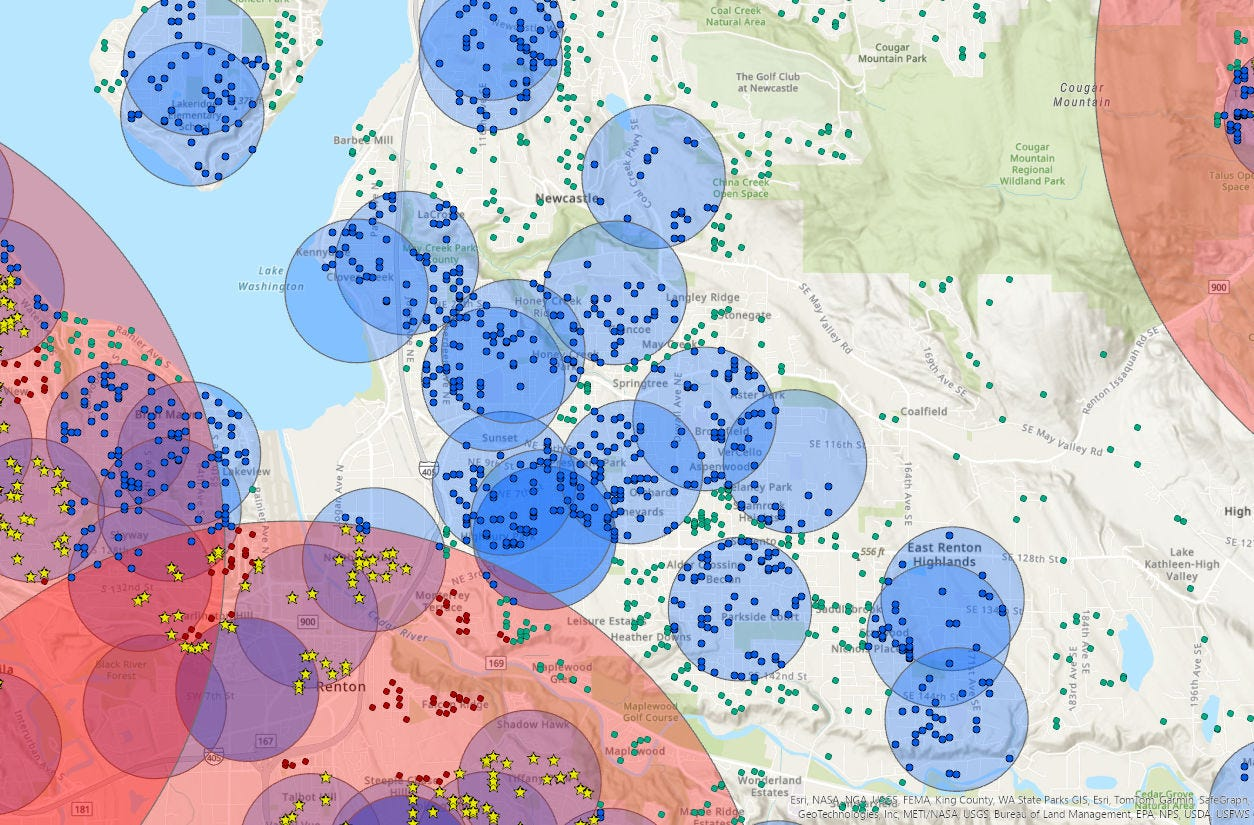

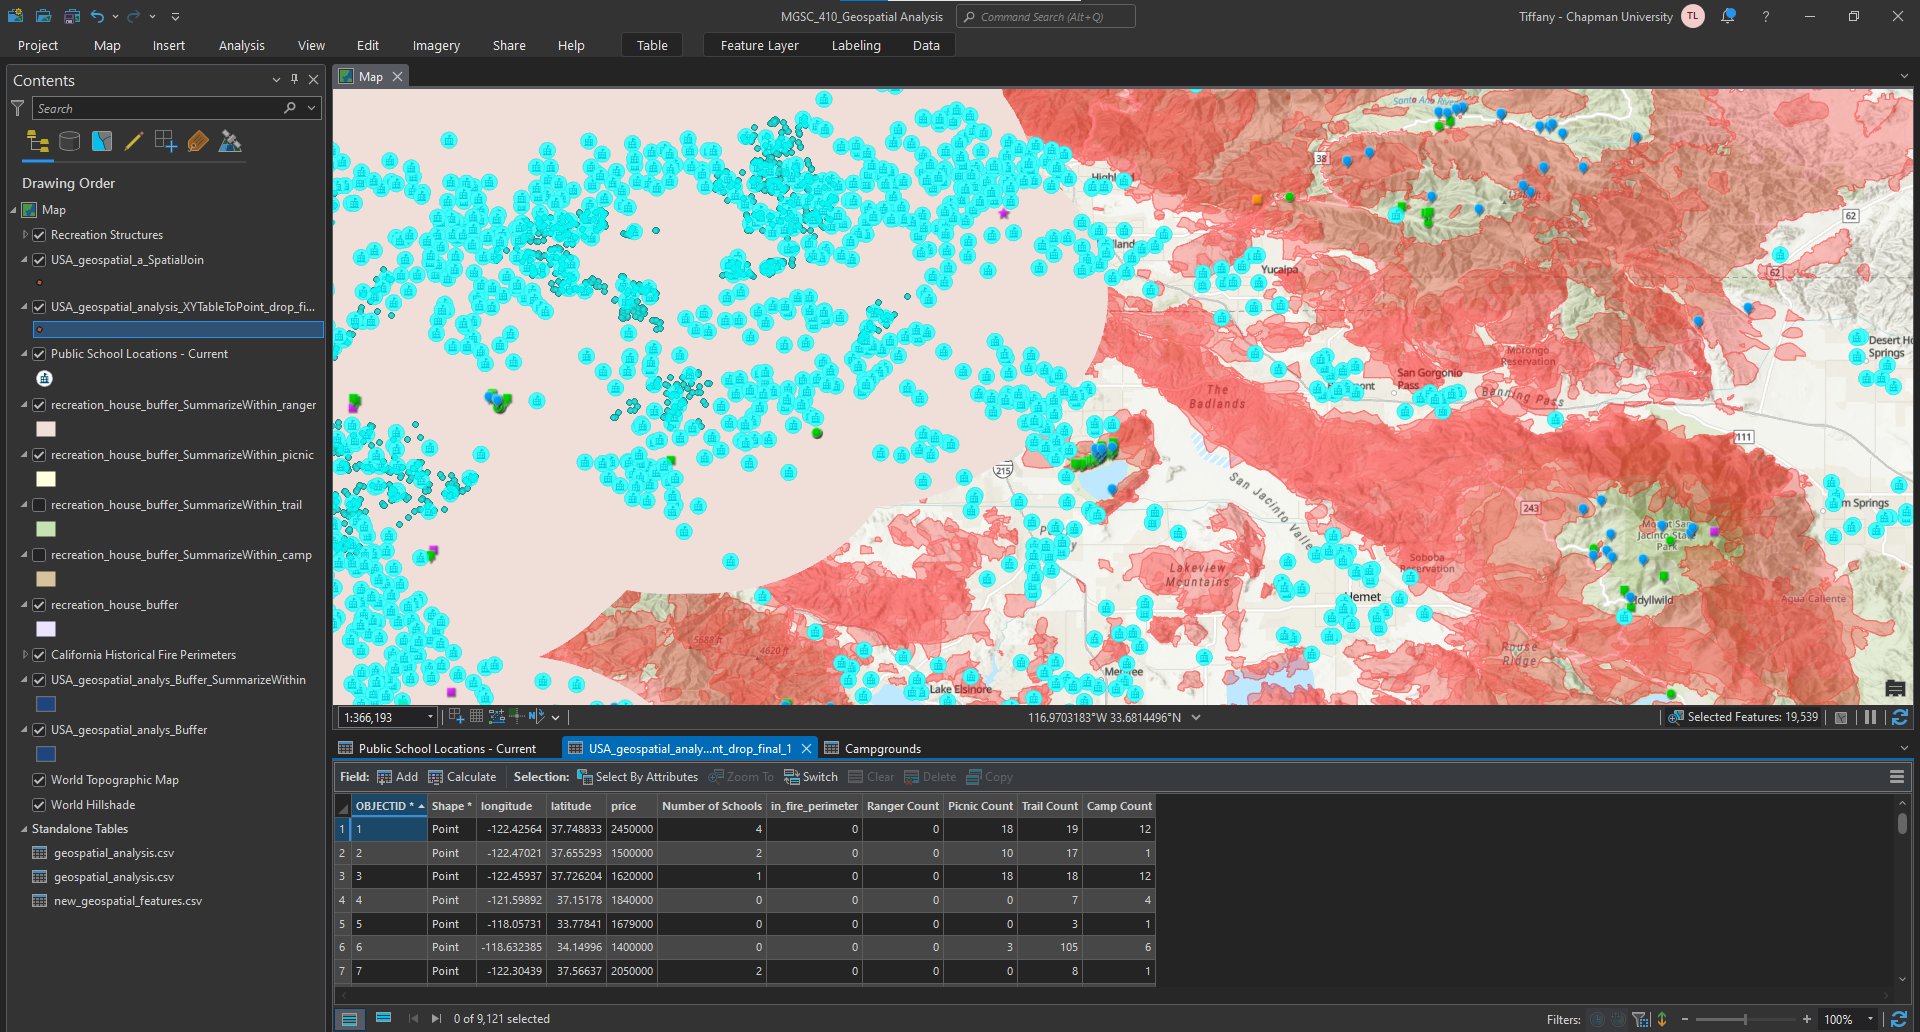

Read in the new features generated by GSA

In [ ]:
# read in the new values of the GSA features
geo_spatial = pd.read_csv('/content/drive/MyDrive/SeniorYear/MGSC 410/Assignment #2/new_geospatial_features.csv')

In [ ]:
# concatenate the original dataset w/ the GSA dataset
df = pd.concat([df, geo_spatial], axis = 1)
df

,schools/1/grades,schools/1/rating,schools/2/size,schools/0/totalCount,county,propertyTypeDimension,monthlyHoaFee,nearbyHomes/3/latitude,nearbyHomes/3/longitude,resoFacts/constructionMaterials/0,...,notHoa,longitude,latitude,price,school_county,in_perimeter,ranger_count,picnic_count,trail_count,camp_county
0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,1,-122.425640,37.748833,2450000,4,0,0,18,19,12
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,1,-122.470210,37.655293,1500000,2,0,0,10,17,1
2,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,...,0,-122.459370,37.726204,1620000,1,0,0,18,18,12
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,1,-121.598920,37.151780,1840000,0,0,0,0,7,4
4,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,1,-118.057310,33.778410,1679000,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9116,NaN,NaN,NaN,NaN,NaN,NaN,0.0,35.334473,-119.16849,NaN,...,1,-119.168120,35.334280,619500,0,0,0,0,0,0
9117,NaN,NaN,NaN,NaN,NaN,NaN,0.0,35.334568,-119.16867,NaN,...,1,-119.168304,35.334373,705000,0,0,0,0,0,0
9118,NaN,NaN,NaN,NaN,NaN,NaN,0.0,35.334763,-119.16904,NaN,...,1,-119.168670,35.334568,635000,0,0,0,0,0,0
9119,NaN,NaN,NaN,NaN,NaN,NaN,0.0,35.394190,-119.23010,NaN,...,1,-119.230100,35.394190,626000,0,0,0,0,0,0


In [ ]:
# checking missing value
df.isna().sum()

,0
schools/1/grades,7469
schools/1/rating,7469
schools/2/size,9121
schools/0/totalCount,9121
county,7468
...,...
in_perimeter,0
ranger_count,0
picnic_count,0
trail_count,0


### Creating a new feature `distance_to_coast`

Measure the shortest distance from a house to a coast

In [ ]:
# read in the USA Coastline shape file
coastline = gpd.read_file('/content/drive/MyDrive/SeniorYear/MGSC 410/Assignment #2/tl_2019_us_coastline/tl_2019_us_coastline.shp')
coastline = coastline.to_crs(epsg=32610)

# function calculates the distance from a point to the nearest coastline feature
def distance_to_coast(point, coastline):
    return coastline.distance(point).min()

Remove duplicated columns

In [ ]:
df = df.loc[:, ~df.columns.duplicated()]

Create a new feature `distance_to_coast` in the dataframe and impute with the values

In [ ]:
# Applying the function to calculate distance to coast for each house
df['distance_to_coast'] = df.apply(
    lambda row: distance_to_coast(Point(float(row['longitude']), float(row['latitude'])), coastline),
    axis=1
)


<ipython-input-23-26853011ab66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_to_coast'] = df.apply(


Write to a csv (optional, and only used as a checkpoint to reduce unncessary computations)

In [ ]:
# write to a new csv
df.to_csv('lotwize_with_gsa.csv', index=False)

In [ ]:
df

,schools/1/grades,schools/1/rating,schools/2/size,schools/0/totalCount,county,propertyTypeDimension,monthlyHoaFee,nearbyHomes/3/latitude,nearbyHomes/3/longitude,resoFacts/constructionMaterials/0,...,nearbyHomes/2/zpid,resoFacts/flooring/0,notHoa,school_county,in_perimeter,ranger_count,picnic_count,trail_count,camp_county,distance_to_coast
0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,2.077507e+09,Tile,1,4,0,0,18,19,12,3.754919e+06
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,1.560648e+07,Hardwood,1,2,0,0,10,17,1,3.754919e+06
2,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,...,1.252437e+08,Linoleum,0,1,0,0,18,18,12,3.754919e+06
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,Carpet,1,0,0,0,0,7,4,3.754920e+06
4,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,Carpet,1,0,0,0,0,3,1,3.754922e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9116,NaN,NaN,NaN,NaN,NaN,NaN,0.0,35.334473,-119.16849,NaN,...,4.330972e+08,NaN,1,0,0,0,0,0,0,3.754921e+06
9117,NaN,NaN,NaN,NaN,NaN,NaN,0.0,35.334568,-119.16867,NaN,...,4.330982e+08,NaN,1,0,0,0,0,0,0,3.754921e+06
9118,NaN,NaN,NaN,NaN,NaN,NaN,0.0,35.334763,-119.16904,NaN,...,4.331076e+08,NaN,1,0,0,0,0,0,0,3.754921e+06
9119,NaN,NaN,NaN,NaN,NaN,NaN,0.0,35.394190,-119.23010,NaN,...,3.484835e+08,NaN,1,0,0,0,0,0,0,3.754921e+06


#Checkpoint #2

Only run the below code if values from the dataset were dropped accidentally

In [ ]:
# disregard if you're just running from the top
df = pd.read_csv('/content/drive/MyDrive/SeniorYear/MGSC 410/Midterm/lotwize_with_gsa.csv')

### Sentiment Analysis using ChatGPT

In [ ]:
tester = df['description']
nan_cnts = tester.isna().sum()
print(nan_cnts)

In [ ]:
tester.dropna

In [ ]:
# USING CHAT GPT FOR SENTIMENT ANALYSIS
!pip install openai==0.28
import openai


# set OpenAI API Key
openai.api_key = XXX

In [ ]:
# Function get sentiment from the OpenAI API
def get_sentiment(text):
  try:
    response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": f"Classify the luxury level of the following comments on a scale from 1 to 10. If the comment is NA give it a score of 0: {text}"}
      ]
    )
    sentiment = response.choices[0].message['content'].strip()
    sentiment = response.choices[0].message['content'].strip()
    if "1" in sentiment.lower():
      return 1
    elif "2" in sentiment.lower():
      return 2
    elif "3" in sentiment.lower():
      return 3
    elif "4" in sentiment.lower():
      return 4
    elif "5" in sentiment.lower():
      return 5
    elif "6" in sentiment.lower():
      return 6
    elif "7" in sentiment.lower():
      return 7
    elif "8" in sentiment.lower():
      return 8
    elif "9" in sentiment.lower():
      return 9
    elif "10" in sentiment.lower():
      return 10
    else:
      return 0
  except Exception as e:
    print(f"Error: {e}")
    return 0

In [ ]:
# apply the function to the comments column and create a new sentiment column
df['Luxury_Score'] = df['description'].apply(get_sentiment)

# count the occurences of each sentiment category
sentiment_counts = df['Luxury_Score'].value_counts()

# plot a pie chart of the sentiment distribution
lables = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['green', 'red', 'orange', 'purple', 'blue', 'black', 'yellow', 'brown', 'cyan', 'pink']  # Good = Green, Bad = Red, Mixed = Orange

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Sentiment Analysis Results')
plt.show()

Dropping some variables that we assume to be irrelevant to the prediction due to the structure or content of the data

In [ ]:
# variables that we won't use
drop_feat = ['nearbyHomes/1/address/city', 'resoFacts/listAOR', 'resoFacts/highSchoolDistrict', 'resoFacts/cityRegion', 'parentRegion/name', 'formattedChip/location/1/fullValue', 'cityId', 'city','address/city','adTargets/city', 'nearbyHomes/3/latitude', 'nearbyHomes/3/longitude', 'attributionInfo/lastChecked', 'attributionInfo/lastUpdated', 'adTargets/zestibuck', 'cityId', 'hasBadGeocode']

In [ ]:
# drop columns listed in no_user_var
df = df.drop(columns=drop_feat)

In [ ]:
df

,schools/1/grades,schools/1/rating,schools/2/size,schools/0/totalCount,county,propertyTypeDimension,monthlyHoaFee,resoFacts/constructionMaterials/0,resoFacts/rooms/1/roomFeatures/0,resoFacts/fencing,...,nearbyHomes/2/zpid,resoFacts/flooring/0,notHoa,school_county,in_perimeter,ranger_count,picnic_count,trail_count,camp_county,distance_to_coast
0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"Back Yard,Fenced",...,2.077507e+09,Tile,1,4,0,0,18,19,12,3.754919e+06
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,DiningAreainLivingRoom,NaN,...,1.560648e+07,Hardwood,1,2,0,0,10,17,1,3.754919e+06
2,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,...,1.252437e+08,Linoleum,0,1,0,0,18,18,12,3.754919e+06
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,PrimaryStallShowers,Back Yard,...,NaN,Carpet,1,0,0,0,0,7,4,3.754920e+06
4,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Kitchen Open to Family Room,NaN,...,NaN,Carpet,1,0,0,0,0,3,1,3.754922e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9116,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,4.330972e+08,NaN,1,0,0,0,0,0,0,3.754921e+06
9117,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,4.330982e+08,NaN,1,0,0,0,0,0,0,3.754921e+06
9118,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,4.331076e+08,NaN,1,0,0,0,0,0,0,3.754921e+06
9119,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,3.484835e+08,NaN,1,0,0,0,0,0,0,3.754921e+06


### DATA Imputation

* Mean Imputation for Continuous
* 0 or `FALSE` Imputation for Categorical

In [ ]:
# Get a list of categorical features (based on dtype 'object' or low unique values)
cat = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Get a list of continuous features (based on dtype 'int64' or 'float64')
contin = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the feature names
print("Categorical feature names:", cat)
print("Continuous feature names:", contin)

Categorical feature names: ['schools/1/grades', 'county', 'propertyTypeDimension', 'resoFacts/constructionMaterials/0', 'resoFacts/rooms/1/roomFeatures/0', 'resoFacts/fencing', 'resoFacts/view/0', 'resoFacts/rooms/1/roomType', 'resoFacts/interiorFeatures/0', 'resoFacts/listingTerms', 'resoFacts/communityFeatures/0', 'resoFacts/patioAndPorchFeatures/1', 'resoFacts/patioAndPorchFeatures/2', 'nearbyHomes/0/homeStatus', 'priceHistory/1/date', 'adTargets/listtp', 'adTargets/lot', 'adTargets/prange', 'adTargets/price_band', 'adTargets/proptp', 'adTargets/sqftrange', 'adTargets/yrblt', 'attributionInfo/listingAgents/1/associatedAgentType', 'attributionInfo/listingOffices/1/associatedOfficeType', 'homeStatus', 'homeType', 'isCurrentSignedInAgentResponsible', 'isListingClaimedByCurrentSignedInUser', 'isPremierBuilder', 'listedBy/0/elements/2/id', 'listingDataSource', 'lotAreaUnits', 'nearbyHomes/0/hdpTypeDimension', 'nearbyHomes/0/isPremierBuilder', 'nearbyHomes/0/isShowcaseListing', 'nearbyHom

Checking for the quantity of missing values per feature

In [ ]:
missing_values = df.isna().sum()
print(missing_values.sort_values(ascending=False))

schools/2/size                       9121
schools/0/totalCount                 9121
resoFacts/patioAndPorchFeatures/2    8743
resoFacts/patioAndPorchFeatures/1    8108
schools/1/grades                     7469
                                     ... 
resoFacts/hasLandLease                  0
resoFacts/hasView                       0
resoFacts/homeType                      0
resoFacts/parkingCapacity               0
distance_to_coast                       0
Length: 223, dtype: int64


In [ ]:
missing_values = df[cat].isna().sum()
print(missing_values.sort_values(ascending=False))

resoFacts/patioAndPorchFeatures/2    8743
resoFacts/patioAndPorchFeatures/1    8108
schools/1/grades                     7469
propertyTypeDimension                7468
county                               7468
                                     ... 
homeStatus                              0
lotAreaUnits                            0
listingDataSource                       0
homeType                                0
isCurrentSignedInAgentResponsible       0
Length: 80, dtype: int64


In [ ]:
missing_values = df[contin].isna().sum()
print(missing_values.sort_values(ascending=False))

schools/0/totalCount         9121
schools/2/size               9121
schools/1/rating             7469
priceHistory/4/price         7391
resoFacts/fireplaces         5716
                             ... 
price                           0
resoFacts/parkingCapacity       0
latitude                        0
longitude                       0
distance_to_coast               0
Length: 143, dtype: int64


Drop Columns with ALL Missing Values

In [ ]:
df = df.drop(columns = ['schools/0/totalCount','schools/2/size'])

In [ ]:
# Get a list of categorical features (based on dtype 'object' or low unique values)
cat = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Get a list of continuous features (based on dtype 'int64' or 'float64')
contin = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the feature names
print("Categorical feature names:", cat)
print("Continuous feature names:", contin)

Categorical feature names: ['schools/1/grades', 'county', 'propertyTypeDimension', 'resoFacts/constructionMaterials/0', 'resoFacts/rooms/1/roomFeatures/0', 'resoFacts/fencing', 'resoFacts/view/0', 'resoFacts/rooms/1/roomType', 'resoFacts/interiorFeatures/0', 'resoFacts/listingTerms', 'resoFacts/communityFeatures/0', 'resoFacts/patioAndPorchFeatures/1', 'resoFacts/patioAndPorchFeatures/2', 'nearbyHomes/0/homeStatus', 'priceHistory/1/date', 'adTargets/listtp', 'adTargets/lot', 'adTargets/prange', 'adTargets/price_band', 'adTargets/proptp', 'adTargets/sqftrange', 'adTargets/yrblt', 'attributionInfo/listingAgents/1/associatedAgentType', 'attributionInfo/listingOffices/1/associatedOfficeType', 'homeStatus', 'homeType', 'isCurrentSignedInAgentResponsible', 'isListingClaimedByCurrentSignedInUser', 'isPremierBuilder', 'listedBy/0/elements/2/id', 'listingDataSource', 'lotAreaUnits', 'nearbyHomes/0/hdpTypeDimension', 'nearbyHomes/0/isPremierBuilder', 'nearbyHomes/0/isShowcaseListing', 'nearbyHom

In [ ]:
df

,schools/1/grades,schools/1/rating,county,propertyTypeDimension,monthlyHoaFee,resoFacts/constructionMaterials/0,resoFacts/rooms/1/roomFeatures/0,resoFacts/fencing,resoFacts/view/0,resoFacts/rooms/1/roomType,...,nearbyHomes/2/zpid,resoFacts/flooring/0,notHoa,school_county,in_perimeter,ranger_count,picnic_count,trail_count,camp_county,distance_to_coast
0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"Back Yard,Fenced",NaN,Bedroom1,...,2.077507e+09,Tile,1,4,0,0,18,19,12,3.754919e+06
1,NaN,NaN,NaN,NaN,0.0,NaN,DiningAreainLivingRoom,NaN,NaN,DiningRoom,...,1.560648e+07,Hardwood,1,2,0,0,10,17,1,3.754919e+06
2,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,Bedroom1,...,1.252437e+08,Linoleum,0,1,0,0,18,18,12,3.754919e+06
3,NaN,NaN,NaN,NaN,0.0,NaN,PrimaryStallShowers,Back Yard,NaN,Bathroom,...,NaN,Carpet,1,0,0,0,0,7,4,3.754920e+06
4,NaN,NaN,NaN,NaN,0.0,NaN,Kitchen Open to Family Room,NaN,Pool,Kitchen,...,NaN,Carpet,1,0,0,0,0,3,1,3.754922e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9116,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,4.330972e+08,NaN,1,0,0,0,0,0,0,3.754921e+06
9117,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,4.330982e+08,NaN,1,0,0,0,0,0,0,3.754921e+06
9118,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,4.331076e+08,NaN,1,0,0,0,0,0,0,3.754921e+06
9119,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,3.484835e+08,NaN,1,0,0,0,0,0,0,3.754921e+06


### Continuous Imputation

In [ ]:
# impute continuous features with the average/mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the selected columns and transform the DataFrame
df[contin] = imputer.fit_transform(df[contin])

df

,schools/1/grades,schools/1/rating,county,propertyTypeDimension,monthlyHoaFee,resoFacts/constructionMaterials/0,resoFacts/rooms/1/roomFeatures/0,resoFacts/fencing,resoFacts/view/0,resoFacts/rooms/1/roomType,...,nearbyHomes/2/zpid,resoFacts/flooring/0,notHoa,school_county,in_perimeter,ranger_count,picnic_count,trail_count,camp_county,distance_to_coast
0,NaN,6.219734,NaN,NaN,0.0,NaN,NaN,"Back Yard,Fenced",NaN,Bedroom1,...,2.077507e+09,Tile,1.0,4.0,0.0,0.0,18.0,19.0,12.0,3.754919e+06
1,NaN,6.219734,NaN,NaN,0.0,NaN,DiningAreainLivingRoom,NaN,NaN,DiningRoom,...,1.560648e+07,Hardwood,1.0,2.0,0.0,0.0,10.0,17.0,1.0,3.754919e+06
2,NaN,6.219734,NaN,NaN,14.0,NaN,NaN,NaN,NaN,Bedroom1,...,1.252437e+08,Linoleum,0.0,1.0,0.0,0.0,18.0,18.0,12.0,3.754919e+06
3,NaN,6.219734,NaN,NaN,0.0,NaN,PrimaryStallShowers,Back Yard,NaN,Bathroom,...,2.356346e+08,Carpet,1.0,0.0,0.0,0.0,0.0,7.0,4.0,3.754920e+06
4,NaN,6.219734,NaN,NaN,0.0,NaN,Kitchen Open to Family Room,NaN,Pool,Kitchen,...,2.356346e+08,Carpet,1.0,0.0,0.0,0.0,0.0,3.0,1.0,3.754922e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9116,NaN,6.219734,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,4.330972e+08,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.754921e+06
9117,NaN,6.219734,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,4.330982e+08,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.754921e+06
9118,NaN,6.219734,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,4.331076e+08,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.754921e+06
9119,NaN,6.219734,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,3.484835e+08,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.754921e+06


### Binary Imputation

In [ ]:
# get binary (0 or 1) feature names
binary_feats = [
    'isCurrentSignedInAgentResponsible',
    'isListingClaimedByCurrentSignedInUser',
    'isPremierBuilder',
    'nearbyHomes/0/isPremierBuilder',
    'nearbyHomes/0/isShowcaseListing',
    'resoFacts/canRaiseHorses',
    'resoFacts/furnished',
    'resoFacts/hasAttachedGarage',
    'resoFacts/hasAttachedProperty',
    'resoFacts/hasCarport',
    'resoFacts/hasCooling',
    'resoFacts/hasFireplace',
    'resoFacts/hasGarage',
    'resoFacts/hasHomeWarranty',
    'resoFacts/hasLandLease',
    'resoFacts/hasView',
    'resoFacts/isNewConstruction',
    'nearbyHomes/1/isPremierBuilder'
]

# impute binary values with FALSE or 0
binary_impute = SimpleImputer(strategy='constant', fill_value='FALSE')
# Fit the imputer on the selected columns and transform the DataFrame
df[binary_feats] = binary_impute.fit_transform(df[binary_feats])

df

,schools/1/grades,schools/1/rating,county,propertyTypeDimension,monthlyHoaFee,resoFacts/constructionMaterials/0,resoFacts/rooms/1/roomFeatures/0,resoFacts/fencing,resoFacts/view/0,resoFacts/rooms/1/roomType,...,nearbyHomes/2/zpid,resoFacts/flooring/0,notHoa,school_county,in_perimeter,ranger_count,picnic_count,trail_count,camp_county,distance_to_coast
0,NaN,6.219734,NaN,NaN,0.0,NaN,NaN,"Back Yard,Fenced",NaN,Bedroom1,...,2.077507e+09,Tile,1.0,4.0,0.0,0.0,18.0,19.0,12.0,3.754919e+06
1,NaN,6.219734,NaN,NaN,0.0,NaN,DiningAreainLivingRoom,NaN,NaN,DiningRoom,...,1.560648e+07,Hardwood,1.0,2.0,0.0,0.0,10.0,17.0,1.0,3.754919e+06
2,NaN,6.219734,NaN,NaN,14.0,NaN,NaN,NaN,NaN,Bedroom1,...,1.252437e+08,Linoleum,0.0,1.0,0.0,0.0,18.0,18.0,12.0,3.754919e+06
3,NaN,6.219734,NaN,NaN,0.0,NaN,PrimaryStallShowers,Back Yard,NaN,Bathroom,...,2.356346e+08,Carpet,1.0,0.0,0.0,0.0,0.0,7.0,4.0,3.754920e+06
4,NaN,6.219734,NaN,NaN,0.0,NaN,Kitchen Open to Family Room,NaN,Pool,Kitchen,...,2.356346e+08,Carpet,1.0,0.0,0.0,0.0,0.0,3.0,1.0,3.754922e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9116,NaN,6.219734,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,4.330972e+08,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.754921e+06
9117,NaN,6.219734,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,4.330982e+08,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.754921e+06
9118,NaN,6.219734,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,4.331076e+08,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.754921e+06
9119,NaN,6.219734,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,3.484835e+08,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.754921e+06


### Categorical Imputation

In [ ]:
categorical_imputer = SimpleImputer(strategy='constant', fill_value='None')
# Fit the imputer on the selected columns and transform the DataFrame
df[cat] = categorical_imputer.fit_transform(df[cat])

# Display the updated DataFrame
df

,schools/1/grades,schools/1/rating,county,propertyTypeDimension,monthlyHoaFee,resoFacts/constructionMaterials/0,resoFacts/rooms/1/roomFeatures/0,resoFacts/fencing,resoFacts/view/0,resoFacts/rooms/1/roomType,...,nearbyHomes/2/zpid,resoFacts/flooring/0,notHoa,school_county,in_perimeter,ranger_count,picnic_count,trail_count,camp_county,distance_to_coast
0,None,6.219734,None,None,0.0,None,None,"Back Yard,Fenced",None,Bedroom1,...,2.077507e+09,Tile,1.0,4.0,0.0,0.0,18.0,19.0,12.0,3.754919e+06
1,None,6.219734,None,None,0.0,None,DiningAreainLivingRoom,None,None,DiningRoom,...,1.560648e+07,Hardwood,1.0,2.0,0.0,0.0,10.0,17.0,1.0,3.754919e+06
2,None,6.219734,None,None,14.0,None,None,None,None,Bedroom1,...,1.252437e+08,Linoleum,0.0,1.0,0.0,0.0,18.0,18.0,12.0,3.754919e+06
3,None,6.219734,None,None,0.0,None,PrimaryStallShowers,Back Yard,None,Bathroom,...,2.356346e+08,Carpet,1.0,0.0,0.0,0.0,0.0,7.0,4.0,3.754920e+06
4,None,6.219734,None,None,0.0,None,Kitchen Open to Family Room,None,Pool,Kitchen,...,2.356346e+08,Carpet,1.0,0.0,0.0,0.0,0.0,3.0,1.0,3.754922e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9116,None,6.219734,None,None,0.0,None,None,None,None,None,...,4.330972e+08,None,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.754921e+06
9117,None,6.219734,None,None,0.0,None,None,None,None,None,...,4.330982e+08,None,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.754921e+06
9118,None,6.219734,None,None,0.0,None,None,None,None,None,...,4.331076e+08,None,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.754921e+06
9119,None,6.219734,None,None,0.0,None,None,None,None,None,...,3.484835e+08,None,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.754921e+06


In [ ]:
# get bool cols
boolean_columns = [
    'isCurrentSignedInAgentResponsible',
    'isListingClaimedByCurrentSignedInUser',
    'isPremierBuilder',
    'nearbyHomes/0/isPremierBuilder',
    'nearbyHomes/0/isShowcaseListing',
    'resoFacts/canRaiseHorses',
    'resoFacts/furnished',
    'resoFacts/hasAssociation',
    'resoFacts/hasAttachedGarage',
    'resoFacts/hasAttachedProperty',
    'resoFacts/hasCarport',
    'resoFacts/hasCooling',
    'resoFacts/hasFireplace',
    'resoFacts/hasGarage',
    'resoFacts/hasHomeWarranty',
    'resoFacts/hasLandLease',
    'resoFacts/hasView',
    'resoFacts/isNewConstruction',
    'nearbyHomes/1/isPremierBuilder'
]

In [ ]:
# Loop through the boolean columns and replace values
for col in boolean_columns:
    df[col] = df[col].replace({'TRUE': 1, 'FALSE': 0, 'None': 0})

# conver to int
df[boolean_columns] = df[boolean_columns].astype(int)

<ipython-input-19-c3d99d3fd2ec>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'TRUE': 1, 'FALSE': 0, 'None': 0})


In [ ]:
df

,schools/1/grades,schools/1/rating,county,propertyTypeDimension,monthlyHoaFee,resoFacts/constructionMaterials/0,resoFacts/rooms/1/roomFeatures/0,resoFacts/fencing,resoFacts/view/0,resoFacts/rooms/1/roomType,...,nearbyHomes/2/zpid,resoFacts/flooring/0,notHoa,school_county,in_perimeter,ranger_count,picnic_count,trail_count,camp_county,distance_to_coast
0,None,6.219734,None,None,0.0,None,None,"Back Yard,Fenced",None,Bedroom1,...,2.077507e+09,Tile,1.0,4.0,0.0,0.0,18.0,19.0,12.0,3.754919e+06
1,None,6.219734,None,None,0.0,None,DiningAreainLivingRoom,None,None,DiningRoom,...,1.560648e+07,Hardwood,1.0,2.0,0.0,0.0,10.0,17.0,1.0,3.754919e+06
2,None,6.219734,None,None,14.0,None,None,None,None,Bedroom1,...,1.252437e+08,Linoleum,0.0,1.0,0.0,0.0,18.0,18.0,12.0,3.754919e+06
3,None,6.219734,None,None,0.0,None,PrimaryStallShowers,Back Yard,None,Bathroom,...,2.356346e+08,Carpet,1.0,0.0,0.0,0.0,0.0,7.0,4.0,3.754920e+06
4,None,6.219734,None,None,0.0,None,Kitchen Open to Family Room,None,Pool,Kitchen,...,2.356346e+08,Carpet,1.0,0.0,0.0,0.0,0.0,3.0,1.0,3.754922e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9116,None,6.219734,None,None,0.0,None,None,None,None,None,...,4.330972e+08,None,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.754921e+06
9117,None,6.219734,None,None,0.0,None,None,None,None,None,...,4.330982e+08,None,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.754921e+06
9118,None,6.219734,None,None,0.0,None,None,None,None,None,...,4.331076e+08,None,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.754921e+06
9119,None,6.219734,None,None,0.0,None,None,None,None,None,...,3.484835e+08,None,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.754921e+06


Get the cleaned & final dataset

In [ ]:
# write to a new csv
df.to_csv('lotwize_cleaned.csv', index=False)

## Exploratory Data Analysis

*   Summary Statistics for Key Variables
*   Creating Visualizations to understand data distributions & relationships
*  Correlation Heatmap to visualize the relationships between different variables

**Doing an EDA on the Top 11 Most Important Features to see the distribution and any patterns within them**


In [ ]:
key_columns = ['livingAreaValue', 'distance_to_coast', 'longitude', 'trail_count', 'homeType', 'nearbyHomes/1/address/zipcode', 'taxHistory/1/value', 'resoFacts/propertySubType/0', 'nearbyHomes/1/longitude', 'resoFacts/listingTerms', 'picnic_count']

In [ ]:
key_columns

['livingAreaValue',
 'distance_to_coast',
 'longitude',
 'trail_count',
 'homeType',
 'nearbyHomes/1/address/zipcode',
 'taxHistory/1/value',
 'resoFacts/propertySubType/0',
 'nearbyHomes/1/longitude',
 'resoFacts/listingTerms',
 'picnic_count']

###1) Summary Statistics

In [ ]:
df[key_columns].describe()

,livingAreaValue,distance_to_coast,longitude,trail_count,nearbyHomes/1/address/zipcode,taxHistory/1/value,nearbyHomes/1/longitude,picnic_count
count,9121.000000,9.121000e+03,9121.000000,9121.000000,9121.000000,9.121000e+03,9121.000000,9121.000000
mean,1613.523609,3.754921e+06,-119.323784,7.600373,93262.984936,4.243791e+05,-119.736326,2.041991
std,750.124358,1.138384e+00,1.700488,14.132737,805.121060,2.741170e+05,1.293822,4.413309
min,0.000000,3.754918e+06,-122.508090,0.000000,90277.000000,2.061000e+03,-122.508090,0.000000
25%,1150.000000,3.754920e+06,-119.869880,0.000000,93262.984936,2.757060e+05,-119.736326,0.000000
50%,1515.000000,3.754922e+06,-119.015690,3.000000,93262.984936,4.243791e+05,-119.736326,0.000000
75%,1914.000000,3.754922e+06,-117.964730,8.000000,93611.000000,4.243791e+05,-119.134445,1.000000
max,10415.000000,3.754923e+06,-116.998276,110.000000,95054.000000,4.667848e+06,-116.996860,24.000000


###2) Visualizing the Data Distributions

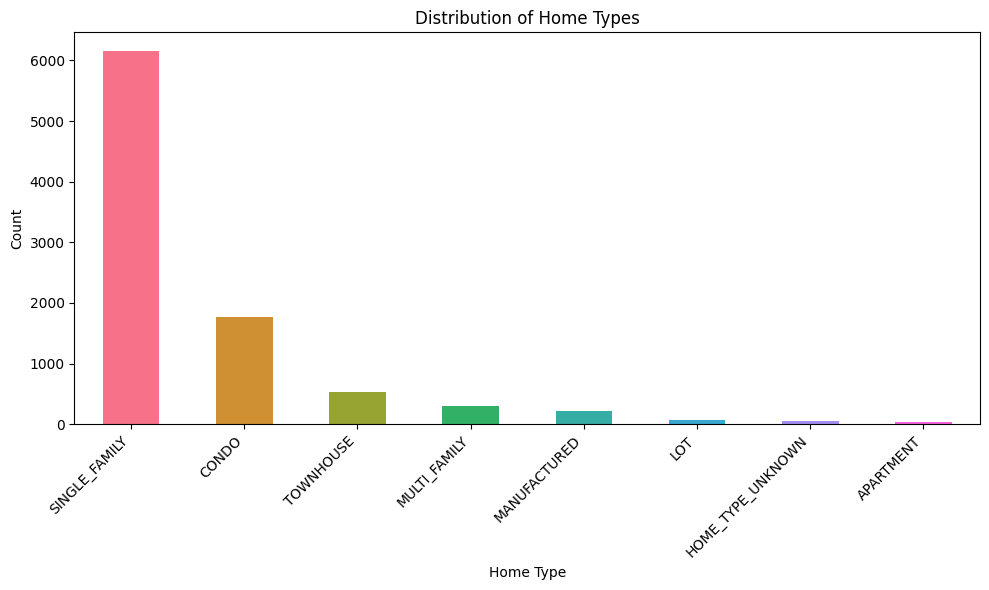

In [ ]:
hometype_counts = df['homeType'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))

colors = sns.color_palette('husl', len(hometype_counts))


hometype_counts.plot(kind='bar', color=colors)

# Set labels and title
plt.xlabel('Home Type')
plt.ylabel('Count')
plt.title('Distribution of Home Types')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Histogram

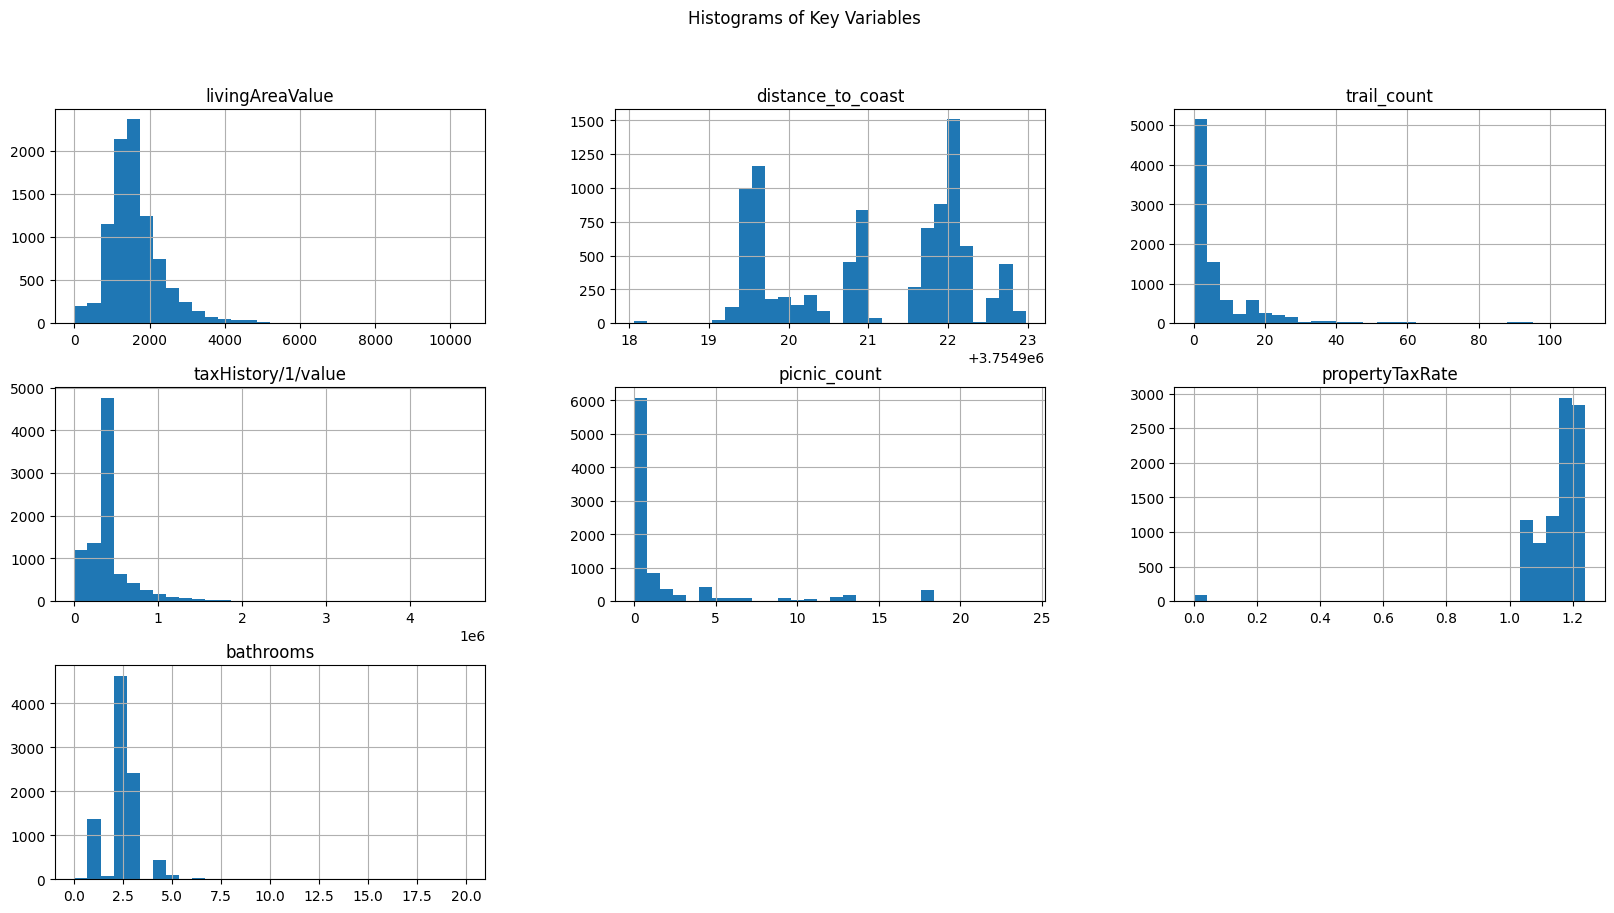

In [ ]:
cont_key = ['livingAreaValue', 'distance_to_coast', 'trail_count', 'taxHistory/1/value', 'picnic_count', 'propertyTaxRate', 'bathrooms']

df[cont_key].hist(bins=30, figsize=(20, 10))
plt.suptitle('Histograms of Key Variables')
plt.show()

Boxplot

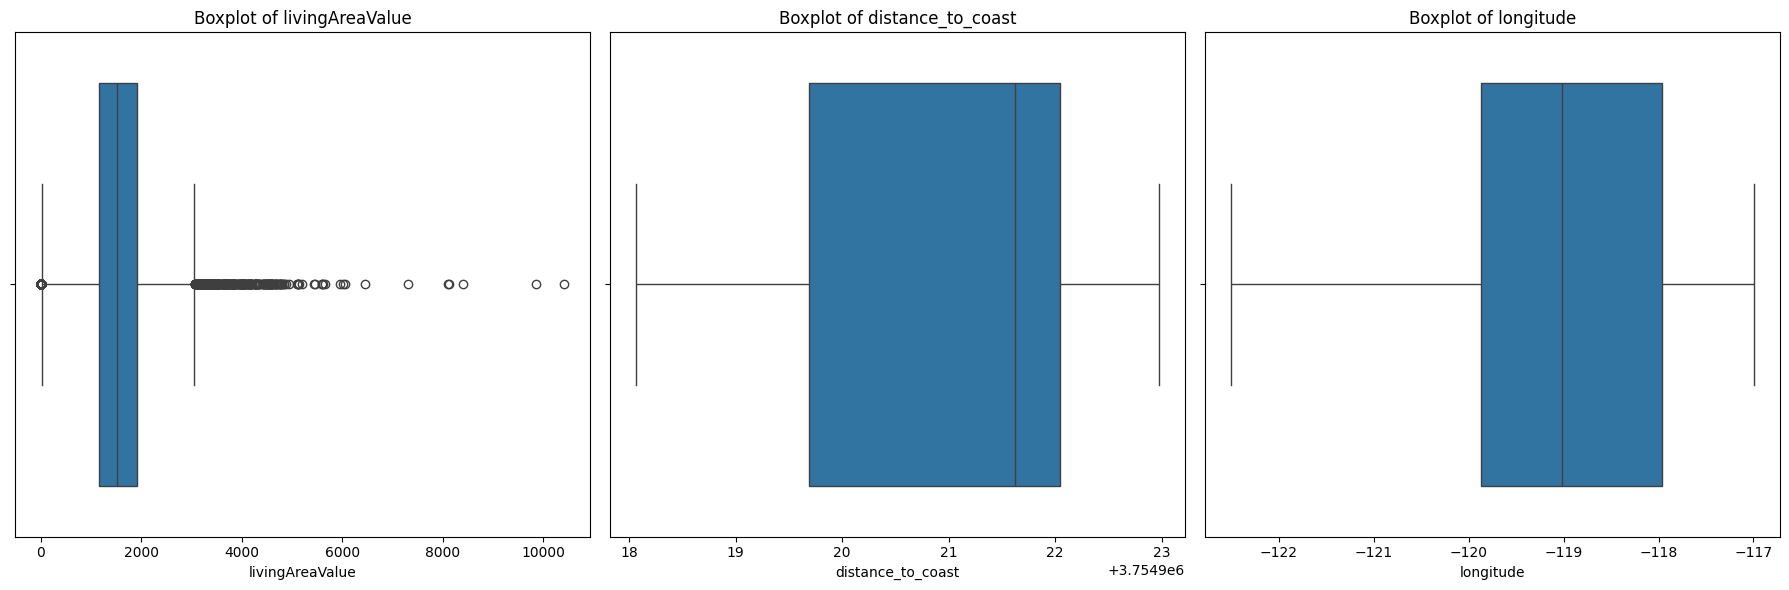

In [ ]:
# Create boxplots for livingAreaValue, distance to coast, and longitude
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x=df['livingAreaValue'], ax=axes[0])
axes[0].set_title('Boxplot of livingAreaValue')

sns.boxplot(x=df['distance_to_coast'], ax=axes[1])
axes[1].set_title('Boxplot of distance_to_coast')

sns.boxplot(x=df['longitude'], ax=axes[2])
axes[2].set_title('Boxplot of longitude')

plt.tight_layout()
plt.show()


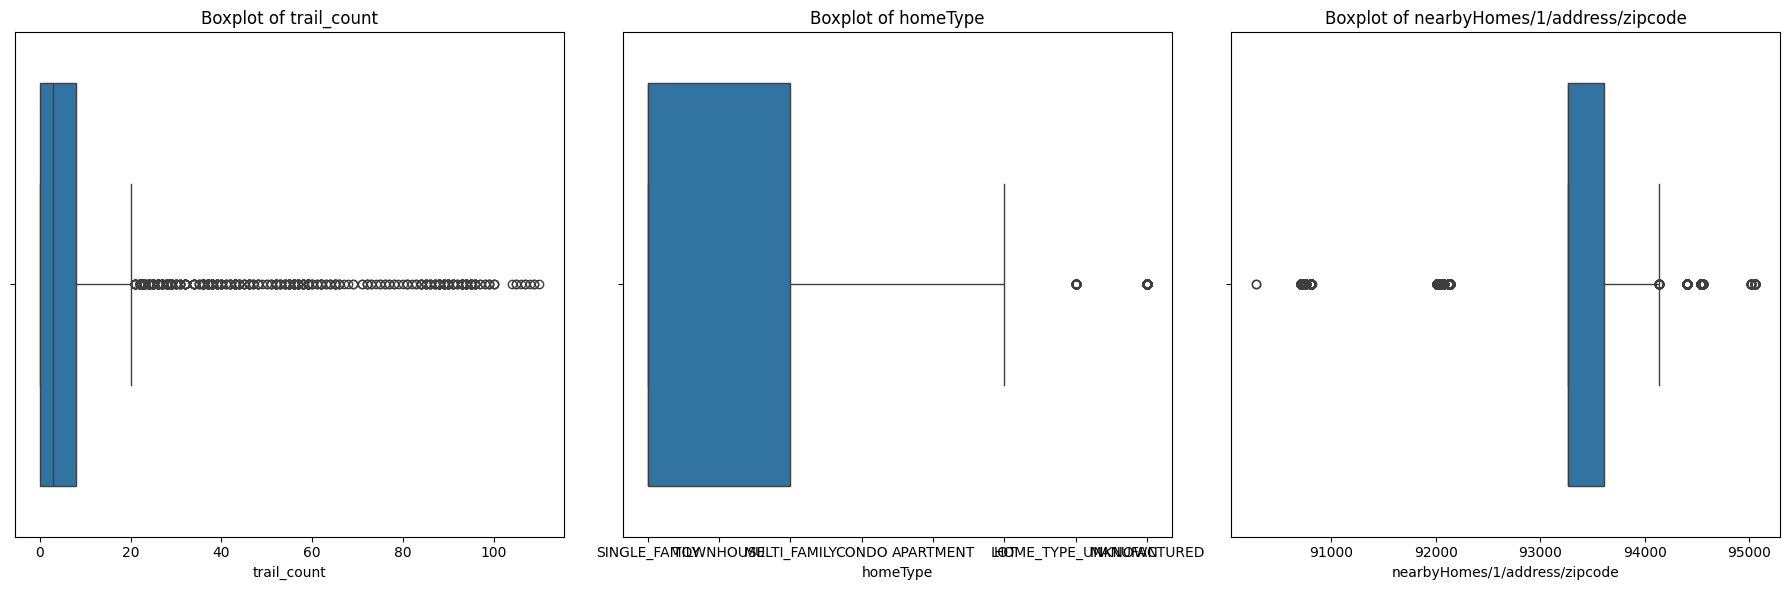

In [ ]:
# Create boxplots for trail_count, homeType, and longitude
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x=df['trail_count'], ax=axes[0])
axes[0].set_title('Boxplot of trail_count')

sns.boxplot(x=df['homeType'], ax=axes[1])
axes[1].set_title('Boxplot of homeType')

sns.boxplot(x=df['nearbyHomes/1/address/zipcode'], ax=axes[2])
axes[2].set_title('Boxplot of nearbyHomes/1/address/zipcode')

plt.tight_layout()
plt.show()


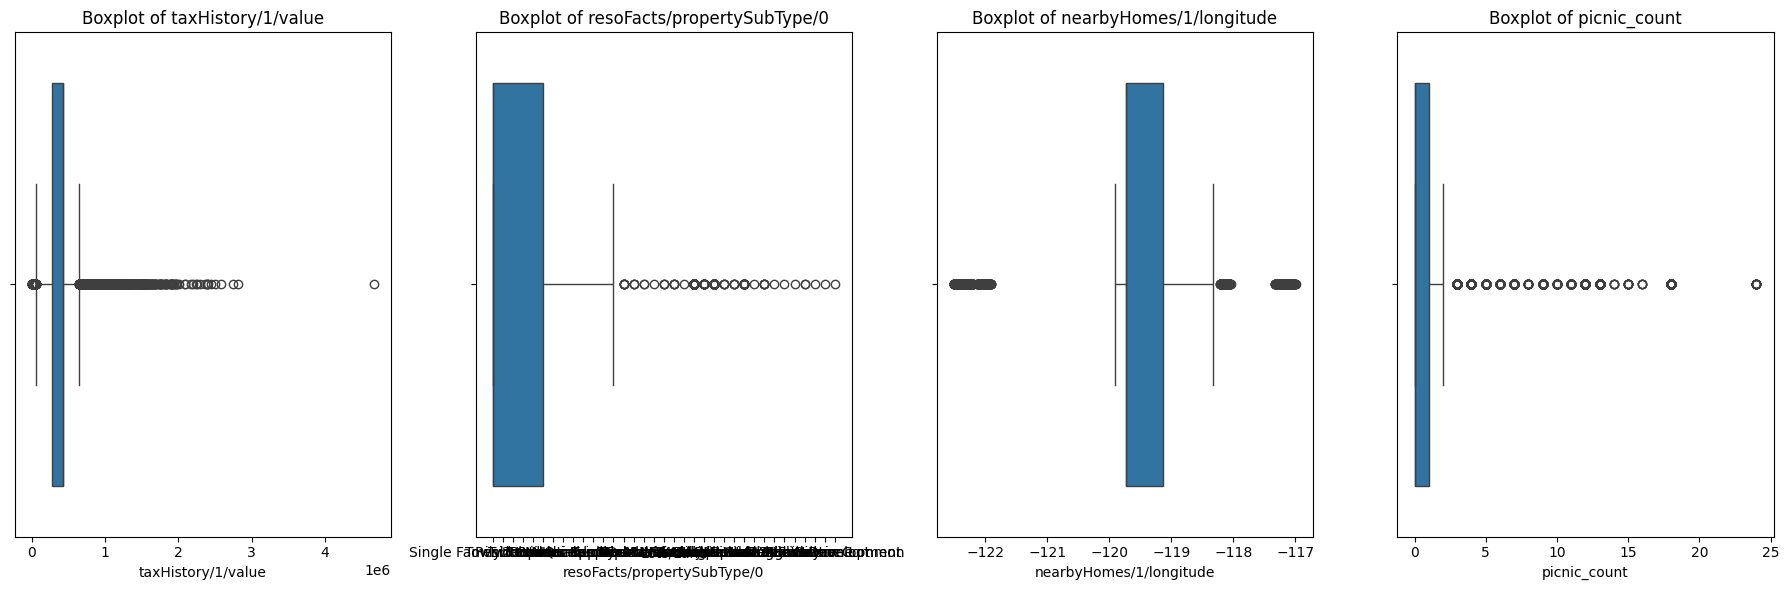

In [ ]:
# Create boxplots for taxHistory/1/value, resoFacts/propertySubType/0, and longitude
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

sns.boxplot(x=df['taxHistory/1/value'], ax=axes[0])
axes[0].set_title('Boxplot of taxHistory/1/value')

sns.boxplot(x=df['resoFacts/propertySubType/0'], ax=axes[1])
axes[1].set_title('Boxplot of resoFacts/propertySubType/0')

sns.boxplot(x=df['nearbyHomes/1/longitude'], ax=axes[2])
axes[2].set_title('Boxplot of nearbyHomes/1/longitude')

sns.boxplot(x=df['picnic_count'], ax=axes[3])
axes[3].set_title('Boxplot of picnic_count')

plt.tight_layout()
plt.show()


## Pre-Processing

In [ ]:
# list of final predictors used in the model
predictors = [
    "nearbyHomes/1/longitude",
    "county",
    "distance_to_coast",
    "livingAreaValue",
    "adTargets/proptp",
    "homeType",
    "resoFacts/propertySubType/0",
    "nearbyHomes/1/address/zipcode",
    "resoFacts/coveredParkingCapacity",
    "resoFacts/garageParkingCapacity",
    "resoFacts/listingTerms",
    "longitude",
    "adTargets/mlong",
    "adTargets/yrblt",
    "propertyTaxRate",
    "adTargets/sqft",
    "resoFacts/interiorFeatures/0",
    "priceHistory/2/source",
    "taxHistory/1/value",
    "priceHistory/1/event",
    "taxHistory/4/value",
    "bathrooms",
    "taxHistory/2/time",
    "resoFacts/flooring/0",
    "resoFacts/lotSize",
    "notHoa",
    "school_county",
    "in_perimeter",
    "ranger_count",
    "picnic_count",
    "trail_count",
    "camp_county"
]


In [ ]:
# Get a list of categorical features (based on dtype 'object' or low unique values)
cat = df[predictors].select_dtypes(include=['object', 'bool']).columns.tolist()

# Get a list of continuous features (based on dtype 'int64' or 'float64')
cont = df[predictors].select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the feature names
print("Categorical feature names:", cat)
print("Continuous feature names:", cont)

Categorical feature names: ['county', 'adTargets/proptp', 'homeType', 'resoFacts/propertySubType/0', 'resoFacts/listingTerms', 'adTargets/yrblt', 'resoFacts/interiorFeatures/0', 'priceHistory/2/source', 'priceHistory/1/event', 'resoFacts/flooring/0', 'resoFacts/lotSize']
Continuous feature names: ['nearbyHomes/1/longitude', 'distance_to_coast', 'livingAreaValue', 'nearbyHomes/1/address/zipcode', 'resoFacts/coveredParkingCapacity', 'resoFacts/garageParkingCapacity', 'longitude', 'adTargets/mlong', 'propertyTaxRate', 'adTargets/sqft', 'taxHistory/1/value', 'taxHistory/4/value', 'bathrooms', 'taxHistory/2/time', 'notHoa', 'school_county', 'in_perimeter', 'ranger_count', 'picnic_count', 'trail_count', 'camp_county']


In [ ]:
# split the data into predictors & predicted feature(s)
X = df[predictors]
y = df['price']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a one hot encode pipe
categorical_pipe = Pipeline([('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

# Z-Scoring
preprocess = make_column_transformer((StandardScaler(), cont),
                            (OneHotEncoder(handle_unknown= 'ignore'), cat),
                            remainder = "passthrough")

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV

lr = Lasso(alpha = 20)

pipe = Pipeline([('preprocess', preprocess), ('lr', lr)])

pipe.fit(X_train, y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# assess performance
print("Train MSE: ", mean_squared_error(y_train, y_pred_train))
print("Train MAE: ", mean_absolute_error(y_train, y_pred_train))
print("Train R2: ", r2_score(y_train, y_pred_train))

print("Test MSE: ", mean_squared_error(y_test, y_pred_test))
print("Test MAE: ", mean_absolute_error(y_test, y_pred_test))
print("Test R2: ", r2_score(y_test, y_pred_test))

Train MSE:  39913244478.913
Train MAE:  140158.66928732186
Train R2:  0.8374608441594307
Test MSE:  82602905487.4662
Test MAE:  195352.23299991098
Test R2:  0.6841317921766367


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29039988415135.03, tolerance: 179161156714.6239
  model = cd_fast.sparse_enet_coordinate_descent(


In [ ]:
# Compute permutation feature importance
perm_importance = permutation_importance(pipe, X_test, y_test, n_repeats=5, random_state=45322)

# Get feature names and their importance values
feature_names = X.columns
sorted_idx = perm_importance.importances_mean.argsort()

# Select the top 75 features
top_n = 75
top_features_idx = sorted_idx[-top_n:]  # Get indices of the top 75 features

# Create a DataFrame for the top features and their permutation importance
top_features_df = pd.DataFrame({
    'Feature': feature_names[top_features_idx],
    'Permutation Importance': perm_importance.importances_mean[top_features_idx]
})

# Sort the DataFrame by importance
top_features_df = top_features_df.sort_values(by='Permutation Importance', ascending=False)

# Display the DataFrame

In [ ]:
top_features_df

# top_features_df.to_excel('perm.xlsx', index=False)

,Feature,Permutation Importance
31,nearbyHomes/1/longitude,0.609325
30,county,0.436771
29,resoFacts/garageParkingCapacity,0.271483
28,resoFacts/coveredParkingCapacity,0.269062
27,distance_to_coast,0.172609
26,livingAreaValue,0.163312
25,resoFacts/propertySubType/0,0.155656
24,adTargets/proptp,0.122535
23,homeType,0.104469
22,nearbyHomes/1/address/zipcode,0.082135


# XGBoost - Chosen Model

In [ ]:
# Gradient Boosting
gb = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, min_child_weight=3, colsample_bytree=0.8, reg_alpha=0.1, reg_lambda = 1.0, subsample=0.8)

pipe = Pipeline([("pre", preprocess),
                ("tree", gb)])

pipe.fit(X_train, y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# assess performance
print("Train MSE: ", mean_squared_error(y_train, y_pred_train))
print("Train MAE: ", mean_absolute_error(y_train, y_pred_train))
print("Train R2: ", r2_score(y_train, y_pred_train))

print("Test MSE: ", mean_squared_error(y_test, y_pred_test))
print("Test MAE: ", mean_absolute_error(y_test, y_pred_test))
print("Test R2: ", r2_score(y_test, y_pred_test))

Train MSE:  42624334422.994415
Train MAE:  135466.2665458813
Train R2:  0.8264204419903798
Test MSE:  49248699787.65584
Test MAE:  146393.70586900684
Test R2:  0.8116761335723461


In [ ]:
perm_importance = permutation_importance(pipe, X_test, y_test, n_repeats=30, random_state=45322)

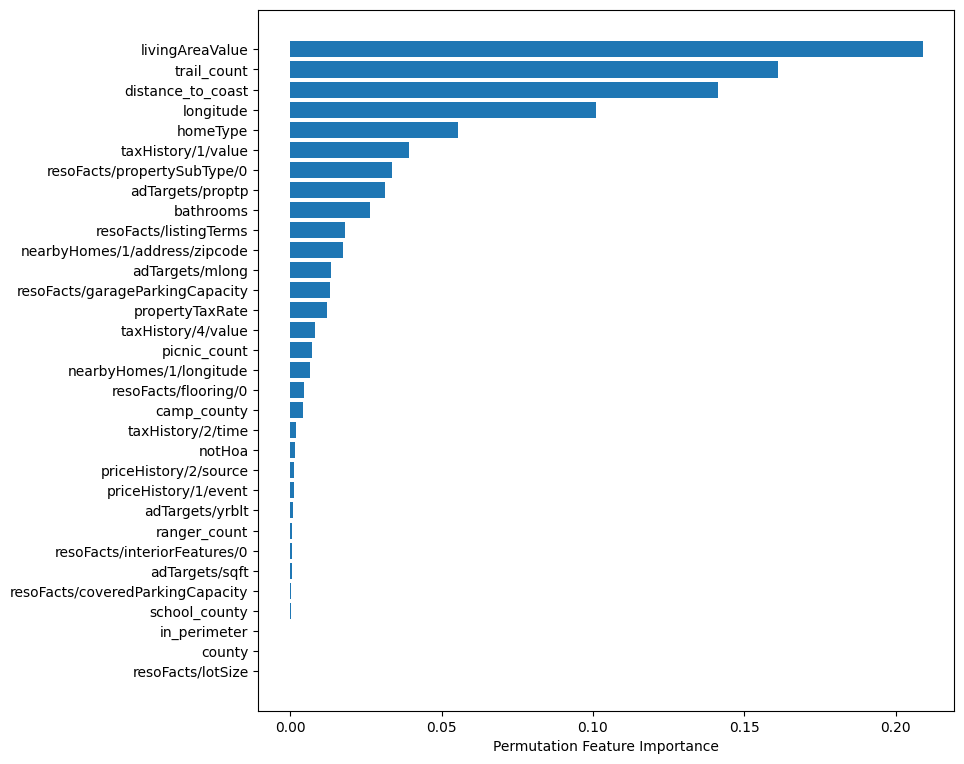

In [ ]:
feature_names = X.columns
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Feature Importance")
plt.tight_layout(pad=2)
plt.show()

In [ ]:
# Define the parameter grid
param_distributions = {
    'tree__n_estimators': np.arange(50, 200, 10),
    'tree__max_depth': np.arange(2, 10),
    'tree__learning_rate': np.logspace(-3, 0, num=10),
    'tree__min_child_weight': np.arange(1, 6),
    'tree__subsample': np.linspace(0.5, 1.0, num=6),
    'tree__colsample_bytree': np.linspace(0.5, 1.0, num=6),
    'tree__reg_alpha': np.logspace(-5, 1, num=7),
    'tree__reg_lambda': np.logspace(-5, 1, num=7)
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(pipe,
                                   param_distributions,
                                   scoring='neg_mean_squared_error',
                                   cv=5,  # Cross-validation folds
                                   verbose=1,
                                   refit = True)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'tree__subsample': 0.6, 'tree__reg_lambda': 1.0, 'tree__reg_alpha': 1.0, 'tree__n_estimators': 90, 'tree__min_child_weight': 3, 'tree__max_depth': 6, 'tree__learning_rate': 0.1, 'tree__colsample_bytree': 1.0}


In [ ]:
best_model = random_search.best_estimator_

# predict
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# assess performance
print("Train MSE: ", mean_squared_error(y_train, y_pred_train))
print("Train MAE: ", mean_absolute_error(y_train, y_pred_train))
print("Train MAPE: ", mean_squared_error(y_train, y_pred_train))
print("Train R2: ", r2_score(y_train, y_pred_train))

print("Test MSE: ", mean_squared_error(y_test, y_pred_test))
print("Test MAE: ", mean_absolute_error(y_test, y_pred_test))
print("Test MAPE: ", mean_squared_error(y_test, y_pred_test))
print("Test R2: ", r2_score(y_test, y_pred_test))

Train MSE:  21786040477.828545
Train MAE:  97428.66238349781
Train MAPE:  21786040477.828545
Train R2:  0.9112804615459023
Test MSE:  38606122488.59625
Test MAE:  125917.66639554795
Test MAPE:  38606122488.59625
Test R2:  0.8523726659550435


In [ ]:
# Compute permutation feature importance
perm_importance = permutation_importance(pipe, X_test, y_test, n_repeats=5, random_state=45322)

# Get feature names and their importance values
feature_names = X.columns
sorted_idx = perm_importance.importances_mean.argsort()

# Select the top 75 features
top_n = 75
top_features_idx = sorted_idx[-top_n:]  # Get indices of the top 75 features

# Create a DataFrame for the top features and their permutation importance
top_features_df = pd.DataFrame({
    'Feature': feature_names[top_features_idx],
    'Permutation Importance': perm_importance.importances_mean[top_features_idx]
})

# Sort the DataFrame by importance
top_features_df = top_features_df.sort_values(by='Permutation Importance', ascending=False)

# Display the DataFrame
top_features_df

,Feature,Permutation Importance
31,livingAreaValue,0.211764
30,trail_count,0.162685
29,distance_to_coast,0.142880
28,longitude,0.099160
27,homeType,0.055884
26,taxHistory/1/value,0.040299
25,resoFacts/propertySubType/0,0.035134
24,adTargets/proptp,0.031453
23,bathrooms,0.026305
22,resoFacts/listingTerms,0.020155
